In [89]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris    # load iris data from datasets in sklearn
%matplotlib inline

In [52]:
iris = load_iris()
dir(iris)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [53]:
data = pd.DataFrame(iris.data, columns = iris['feature_names'])

In [54]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [91]:
# Adding target and flowers_name columns to data
data['target'] = iris.target
data['flowers_name'] = data.target.apply(lambda x: iris.target_names[x])   #by using data.target column, insert values into flowers_name column

In [72]:
data.iloc[0:2,:]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flowers_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa


In [74]:
df = data.drop(['target','flowers_name'], axis = 'columns')            

In [75]:
from sklearn.model_selection import train_test_split       


In [90]:
X_train, X_test, y_train, y_test = train_test_split(df, data.target,test_size = 0.3)    #train our data dividing data into train and test data

In [77]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [78]:
model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [79]:
model.score(X_test,y_test)

0.9111111111111111

In [80]:
y_predicted = model.predict(X_test)

In [81]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_predicted)

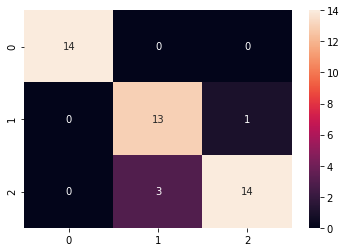

In [92]:
#ploting heatmap to visualize confusion matrix of y_test and y_predicted
sns.heatmap(cm, annot = True)

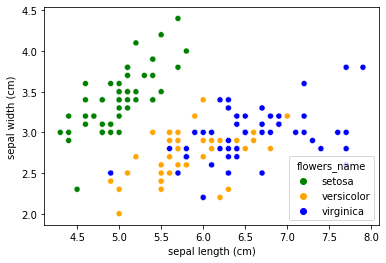

In [85]:
sns.scatterplot(x = 'sepal length (cm)',y = 'sepal width (cm)', hue = data['flowers_name'], data = df, palette=['green','orange','blue'])


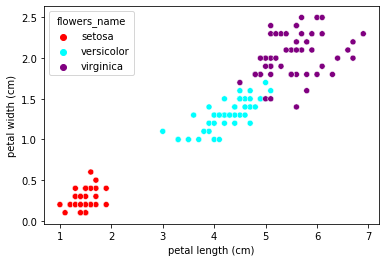

In [87]:
sns.scatterplot(x = 'petal length (cm)',y = 'petal width (cm)', hue = data['flowers_name'], data = df, palette=['red','cyan','purple'])


In [88]:
from sklearn.metrics import mean_absolute_error
print("Mean absolute error:", mean_absolute_error(y_test,y_predicted))

Mean absolute error: 0.08888888888888889
